In [6]:
pwd

'C:\\Users\\DELL\\Practical Assignment'

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [8]:
completedf = pd.read_csv("house_data_complete.csv")
training1 = pd.read_csv("house_prices_data_training_data.csv")
training1 = training1.dropna()
print(training1.isnull().values.sum())

0


In [9]:
# cleaning the dataset

completedf1 = completedf.drop(['id','date','zipcode','lat','long'],1)
training1 = training1.drop(['id','date','zipcode','lat','long'],1)

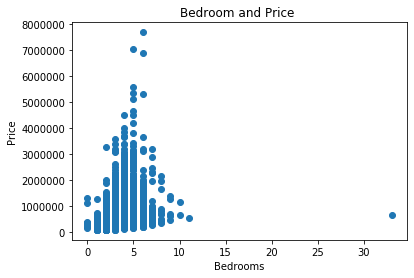

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [11]:
plt.scatter(training1.bedrooms,training1.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

Text(0.5, 1.0, 'Price vs yr_built')

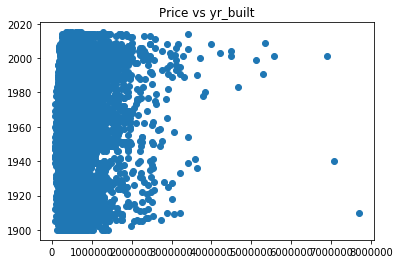

In [13]:
plt.scatter(training1.price,training1.yr_built)
plt.title("Price vs yr_built")

Text(0.5, 1.0, 'Price vs sqft_living15')

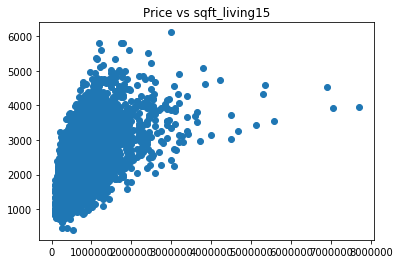

In [14]:
plt.scatter(training1.price,training1.sqft_living15)
plt.title("Price vs sqft_living15")

Text(0.5, 1.0, 'Price vs Square Feet')

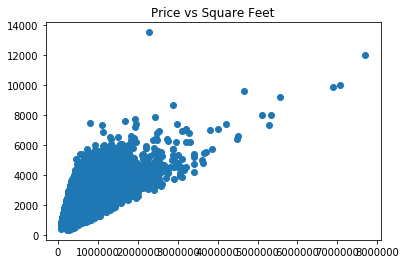

In [15]:
plt.scatter(training1.price,training1.sqft_living)
plt.title("Price vs Square Feet")

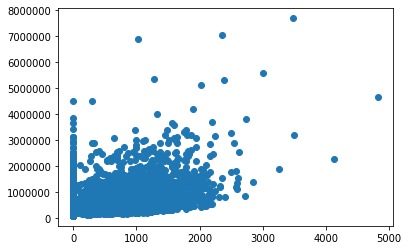

In [16]:
plt.scatter((training1['sqft_basement']),training1['price'])

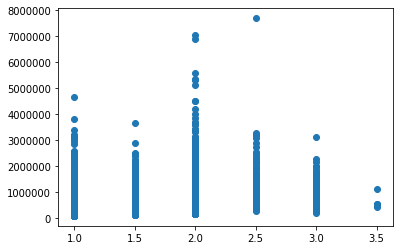

In [17]:
plt.scatter(training1.floors,training1.price)

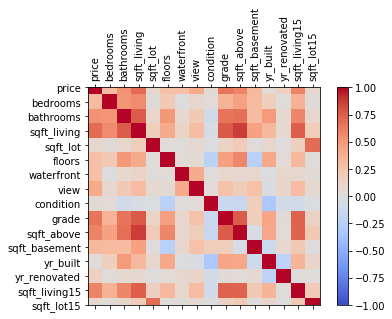

In [18]:
# visualising data

names=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement']
corr = training1.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(training1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(training1.columns)
ax.set_yticklabels(training1.columns)
plt.show()

0
17999
1806
1807
theta computed from gradient descent: [ -10782.17012682   45672.49418593  284770.72780632  317112.31701913
   14170.93370614  206909.88720268  160253.16093674  371374.21327275
   76135.89484573  433438.28492947  340922.502641    226664.93286672
 -185390.61436429  123963.42714761  432126.5605322     6143.4387558 ]
theta computed from gradient descent: [  25384.16562813   56418.63855425  318813.72876417  166005.43616792
   17804.61102385  226080.97945713  162469.1030441   393072.80322426
   91620.99823084  484285.03168503  378689.64799936  248772.23218035
 -156454.12255564  130003.12467915  387184.19145453    9838.7220505 ]
theta computed from gradient descent: [5.32396541e+05 3.92407208e-07 1.69906426e-06 1.34819772e-06
 1.65555567e-03 1.10049118e-02 7.59614030e-07 3.32907687e-08
 5.09288638e-07 1.39532466e-06 4.03225975e-06 1.34362133e-03
 3.11934347e-04 7.73443565e-04 1.14261259e-04 1.31155468e-03
 7.80456668e-03 7.56926882e-06 5.74674776e-06 7.02298605e-03
 4.455461

[32569786875.03407, 33469823298.970566, 35045353632.71292]

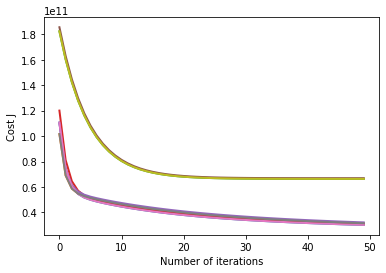

In [46]:
# validation and test sets split

TestPlusVal1 = 3613

J_testall = [] 

k_fold = 3

for i in range(k_fold):
        if (i == 0):
            TestPlusVal = completedf1[18000:]
            Valdf = TestPlusVal[:round(TestPlusVal1/2)]
            Testdf =  TestPlusVal[round(TestPlusVal1/2):] 
        elif (i == 1):
            training1 = completedf1[TestPlusVal1 + 1:]
            Valdf =  completedf1[0 : round(TestPlusVal1/2)]
            Testdf = completedf1[round(TestPlusVal1/2) : TestPlusVal1]
        else : 
            training1 = completedf1[round(TestPlusVal1/2): 19805]
            Valdf =  completedf1[19806 : ]
            Testdf = completedf1[0 :round(TestPlusVal1/2) ]

        print(i)
        print(training1.shape[0])
        print(Valdf.shape[0])
        print(Testdf.shape[0])
        
        #TestPlusVal = completedf1[18000:]

        #Valdf = TestPlusVal[:round(TestPlusVal.shape[0]/2)]
        #Testdf =  TestPlusVal[round(TestPlusVal.shape[0]/2):]

        #hyp 1

        y_train1 = training1['price']
        x_train1 = training1.drop(['price'],1)

        train_size1 = y_train1.size

        X_train1 = (x_train1 - x_train1.min())/(x_train1.max() - x_train1.min())



        y_val1 = Valdf['price']
        x_val1 = Valdf.drop(['price'],1)

        val_size1 = y_val1.size

        X_val1 = (x_val1 - x_val1.min())/(x_val1.max() - x_val1.min())




        y_test1 = Testdf['price']
        x_test1 = Testdf.drop(['price'],1)

        test_size1 = y_test1.size

        X_test1 = (x_test1 - x_test1.min())/(x_test1.max() - x_test1.min())

        

        X_train1 = np.concatenate([np.ones((train_size1, 1)), X_train1], axis=1)
        X_val1 = np.concatenate([np.ones((val_size1, 1)), X_val1], axis=1)
        X_test1 = np.concatenate([np.ones((test_size1, 1)), X_test1], axis=1)
        


        #hyp 2

        y_train2 = training1['price']
        x_train2 = training1.drop(['price'],1)

        x_train2['sqft_living15'] = x_train2['sqft_living15']**2
        x_train2['sqft_living'] = x_train2['sqft_living']**2


        train_size2 = y_train2.size

        X_train2 = (x_train2 - x_train2.min())/(x_train2.max() - x_train2.min())




        y_val2 = Valdf['price']
        x_val2 = Valdf.drop(['price'],1)


        x_val2['sqft_living15'] = x_val2['sqft_living15']**2

        val_size2 = y_val2.size

        X_val2 = (x_val2 - x_val2.min())/(x_val2.max() - x_val2.min())




        y_test2 = Testdf['price']
        x_test2 = Testdf.drop(['price'],1)

        x_test2['sqft_living15'] = x_test2['sqft_living15']**2

        test_size2 = y_test2.size

        X_test2 = (x_test2 - x_test2.min())/(x_test2.max() - x_test2.min())



        X_train2 = np.concatenate([np.ones((train_size2, 1)), X_train2], axis=1)
        X_val2 = np.concatenate([np.ones((val_size2, 1)), X_val2], axis=1)
        X_test2 = np.concatenate([np.ones((test_size2, 1)), X_test2], axis=1)

        #hyp 3

        y_train3 = training1['price']
        x_train3 = training1.drop(['price'],1)


        poly = PolynomialFeatures(2)

        # Transforming the data into the sixth power polynomial
        x_train3 = poly.fit_transform(x_train3)


        train_size3 = y_train3.size

        X_train3 = (x_train3 - x_train3.min())/(x_train3.max() - x_train3.min())




        y_val3 = Valdf['price']
        x_val3 = Valdf.drop(['price'],1)


        x_val3 = poly.fit_transform(x_val3)

        val_size3 = y_val3.size

        X_val3 = (x_val3 - x_val3.min())/(x_val3.max() - x_val3.min())




        y_test3 = Testdf['price']
        x_test3 = Testdf.drop(['price'],1)

        x_test3 = poly.fit_transform(x_test3)

        test_size3 = y_test3.size

        X_test3 = (x_test3 - x_test3.min())/(x_test3.max() - x_test3.min())


        X_train3 = np.concatenate([np.ones((train_size3, 1)), X_train3], axis=1)
        X_val3 = np.concatenate([np.ones((val_size3, 1)), X_val3], axis=1)
        X_test3 = np.concatenate([np.ones((test_size3, 1)), X_test3], axis=1)


        ###################################################################################################

        def computeCost(X, y, theta, Lambda):
            
            m = y.size
            sumofh0x=np.dot(X,theta)
            J = ( np.dot((sumofh0x - y), (sumofh0x - y)) / (2 * m) ) + ((1/2 * Lambda * np.sum(np.square(theta[1:]))) /
                                                                                 m)    
            return J

        ###################################################################################################

        def computeCostCV(X, y, theta):
            
            m = y.size
            sumofh0x=np.dot(X,theta)
            J =  np.dot((sumofh0x - y), (sumofh0x - y)) / (2 * m)     
            return J

        ###################################################################################################

        def gradientDescent(X, y, X_cv,Y_cv, theta, Lambda, alpha, num_iters):

            
            train_size = y.size  # number of training examples
            val_size = Y_cv.size

            
            theta = theta.copy()

            J_history = [] 
            J_cv = []

            thetaNoZeroReg = np.insert(theta[1:], 0, 0)


            for i in range(num_iters):
                sumofh0x=np.dot(X,theta)
                theta=theta-((alpha/train_size)*(np.dot(X.T,sumofh0x-y))) + (Lambda * thetaNoZeroReg)
                # save the cost J in every iteration
                J_history.append(computeCost(X, y, theta, Lambda))

            J_cv.append(computeCostCV(X_cv, Y_cv, theta)) 
            return theta, J_history, J_cv

        ###################################################################################################

        # hypothesis 1  linear

        initial_theta1 = np.zeros((X_train1.shape[1]))
        Lambda = np.array([0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.28, 2.56, 5.12
                          , 10.24])
        alpha = 0.7
        num_iters = 50
        J_cv_all1 = []

        for i in range(Lambda.size):
            theta1, J_history1, J_cv1 = gradientDescent(X_train1, y_train1, X_val1, y_val1, initial_theta1, Lambda[i], alpha, num_iters)
            J_cv_all1.append(J_cv1)



        # Plot the convergence graph
        pyplot.plot(np.arange(len(J_history1)), J_history1, lw=2)
        pyplot.xlabel('Number of iterations')
        pyplot.ylabel('Cost J')

        # Display the gradient descent's result
        print('theta computed from gradient descent: {:s}'.format(str(theta1)))

        ###################################################################################################

        #hypothesis 2  squaring 1 feature

        initial_theta2 = np.zeros((X_train2.shape[1]))
        Lambda = np.array([0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.28, 2.56, 5.12
                          , 10.24])
        alpha = 0.7
        num_iters = 50
        J_cv_all2 = []

        for i in range(Lambda.size):
            theta2, J_history2, J_cv2 = gradientDescent(X_train2, y_train2, X_val2, y_val2, initial_theta2, Lambda[i], alpha, num_iters)
            J_cv_all2.append(J_cv2)

            # Plot the convergence graph
        pyplot.plot(np.arange(len(J_history2)), J_history2, lw=2)
        pyplot.xlabel('Number of iterations')
        pyplot.ylabel('Cost J')

        # Display the gradient descent's result
        print('theta computed from gradient descent: {:s}'.format(str(theta2)))


        ###################################################################################################

        #hypothesis 3  polynomial

        initial_theta3 = np.zeros((X_train3.shape[1]))
        Lambda = np.array([0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.28, 2.56, 5.12
                          , 10.24])
        alpha = 0.1
        num_iters = 50
        J_cv_all3 = []

        for i in range(Lambda.size):
            theta3, J_history3, J_cv3 = gradientDescent(X_train3, y_train3, X_val3, y_val3, initial_theta3, Lambda[i], alpha, num_iters)
            J_cv_all3.append(J_cv3)

        # Plot the convergence graph
        pyplot.plot(np.arange(len(J_history3)), J_history3, lw=2)
        pyplot.xlabel('Number of iterations')
        pyplot.ylabel('Cost J')

        # Display the gradient descent's result
        print('theta computed from gradient descent: {:s}'.format(str(theta3)))   

        ###################################################################################################
          
            
        min_cv1 = min(J_cv_all1)
        min_cv2 = min(J_cv_all2)
        min_cv3 = min(J_cv_all3)

        if (min_cv1 < min_cv2 and   min_cv1 < min_cv3):
            J_test = computeCostCV(X_test1, y_test1, theta1)
        elif (min_cv2 < min_cv1 and   min_cv2 < min_cv3):   
            J_test = computeCostCV(X_test2, y_test2, theta2)
        elif (min_cv3 < min_cv1 and   min_cv3 < min_cv2):      
            J_test = computeCostCV(X_test3, y_test3, theta3)

        J_testall.append(J_test) 
        
J_testall        